## Differential Evolution

let $\mathbb{X}^{t} = \left\lbrace \mathbf{x}_1^{t},\ldots,\mathbf{x}_n^{t} \right\rbrace$ the population at time $t$, $f: \mathbb{X} \rightarrow \mathbb{R}$ the objective function, $g_i(\mathbf{x}) \leq 0$ for $i=1,2,\ldots,m_1$ the soft restrictions and $h_i(\mathbf{x}) = 0$ for $i=1,2,\ldots,m_2$ the hard restrictions of an optimization problem. Set $F\sim U[0, 2]$ and $\text{CR}$

[![](https://mermaid.ink/img/pako:eNptkMFugzAMhl8F-TiVUmCjLYed2uMu63HsYBID0SBBwalUId59oVXpKs2n-Pt-WXZGEEYS5DAwMh0U1ha78JwUOvD19fIdhOF78OG8VUbf6L27qk8SpiuV_uOf0DV0opbEI7C0_wx_dn6BG74XrKAj26GSfudxdgVwQx0VkPunRPtTQKEnn0PH5nTRAnK2jlbgevk4EfIK22GhR6nY2AW2BiX5dgS-9PPv1GpgP1IYXal65s62HjfM_ZBH0azXteLGlWt_ezQo2aDl5rzPoizJdpiklG1TfEtTKcp4v6uS17iS202cIEzT9AtNUH0z)](https://mermaid.live/edit#pako:eNptkMFugzAMhl8F-TiVUmCjLYed2uMu63HsYBID0SBBwalUId59oVXpKs2n-Pt-WXZGEEYS5DAwMh0U1ha78JwUOvD19fIdhOF78OG8VUbf6L27qk8SpiuV_uOf0DV0opbEI7C0_wx_dn6BG74XrKAj26GSfudxdgVwQx0VkPunRPtTQKEnn0PH5nTRAnK2jlbgevk4EfIK22GhR6nY2AW2BiX5dgS-9PPv1GpgP1IYXal65s62HjfM_ZBH0azXteLGlWt_ezQo2aDl5rzPoizJdpiklG1TfEtTKcp4v6uS17iS202cIEzT9AtNUH0z)

### **Mutation**

set $i\neq r_1 \neq r_2 \neq r_3 \neq r_4 \neq r_5$ where $r_1, r_2, r_3, r_4, r_5 \sim U[1, d]$ (for $\mathbb{X} \subset \mathbb{R}^{d}$)

1. (**rand-1**) $\mathbf{v}_i^{t + 1} = \mathbf{x}_{r_1}^{t} + F (\mathbf{x}_{r_2}^{t} - \mathbf{x}_{r_3}^{t})$

2. (**best-1**) $\mathbf{v}_i^{t + 1} = \mathbf{x}_{best}^{t} + F (\mathbf{x}_{r_1}^{t} - \mathbf{x}_{r_2}^{t})$

3. (**current-to-best-1**) $\mathbf{v}_i^{t + 1} = \mathbf{x}_{i}^{t} + F (\mathbf{x}_{best}^{t} - \mathbf{x}_{i}^{t}) + F (\mathbf{x}_{r_1}^{t} - \mathbf{x}_{r_2}^{t})$

4. (**best-2**) $\mathbf{v}_i^{t + 1} = \mathbf{x}_{best}^{t} + F (\mathbf{x}_{r_1}^{t} - \mathbf{x}_{r_2}^{t}) + F (\mathbf{x}_{r_3}^{t} - \mathbf{x}_{r_4}^{t})$

5. (**rand-2**) $\mathbf{v}_i^{t + 1} = \mathbf{x}_{r_1}^{t} + F (\mathbf{x}_{r_2}^{t} - \mathbf{x}_{r_3}^{t}) + F (\mathbf{x}_{r_4}^{t} - \mathbf{x}_{r_5}^{t})$

### **Recombination**

For each $i,j$ set $\text{rand}\sim U[0, 1]$ and $j_{\text{rand}}\sim U[1, d]$ to uniformly selected random numbers:

$$\mathbf{u}_{i,j}^{t+1} = \left\lbrace \begin{array}{l l}
\mathbf{v}_{i,j}^{t+1} & \text{rand} \leq \text{CR} \ or \ j=j_{\text{rand}} \\
\mathbf{x}_{i,j}^{t} & \text{otherwise} \end{array}\right.$$

### **Selection**

$$\mathbf{x}_{i}^{t+1} = \left\lbrace \begin{array}{l l}
\mathbf{u}_{i}^{t+1} & \text{DEB}(\mathbf{u}_i^{t+1}, \mathbf{x}_i^{t}) = \mathbf{u}_{i}^{t+1} \\
\mathbf{x}_{i}^{t} & \text{otherwise} \end{array}\right.$$

Where $\text{DEB}(\cdot,\cdot)$ returns the best value between $\mathbf{u}_i^{t+1}$ and $\mathbf{x}_i^{t}$ according to DEB conditions.


In [1]:
from IPython.display import display_markdown
from pyIpnHeuristic.benchmark import get_pg06

problem_parameters = get_pg06()

objective_function = problem_parameters.get("objective_function")
g = problem_parameters.get("gx")
h = problem_parameters.get("hx")
ranges = problem_parameters.get("ranges")
markdown = problem_parameters.get("markdown")
x_best = problem_parameters.get("x")
fx_best = problem_parameters.get("fx")

display_markdown(markdown, raw=True)
display_markdown("$\mathbf{{x}}_{{best}}$: {}, $f(\mathbf{{x}}_{{best}})$: {}, ranges: {}".format(x_best, fx_best, ranges), raw=True)

## Problem G06:
Minimize: 
$$f(\mathbf{x}) = (x_1 - 10)^3 + (x_2 - 20)^3$$
subject to:
$$g_1(\mathbf{x}) = -(x_1-5)^2 - (x_2-5)^2 + 100 \leq 0 $$
$$g_2(\mathbf{x}) = (x_1-6)^2 + (x_2-5)^2 - 82.81 \leq 0 $$
where: $13 \leq x_1 \leq 100$, $0 \leq x_2 \leq 100$

$\mathbf{x}_{best}$: [14.095, 0.8429607892154796], $f(\mathbf{x}_{best})$: -6961.813875580138, ranges: [[13, 100], [0, 100]]

## Initialize Differential Evolution

In [2]:
from pyIpnHeuristic.differentialEvolution import DifferentialEvolution

differentialEvolution = DifferentialEvolution(
    objective_function,
    soft_constrains=g,
    hard_constrains=h,
    ranges=ranges,
    population_size=4,
    smooth=True,
    epsilon=10**-4,
    f=0.9,
    cr=0.05,
)

differentialEvolution.search(iterations=100000, save_history=True)

## Results

In [3]:
import pandas as pd
import numpy as np

pd.DataFrame(
    sorted([{**hist, 
             "||xi-X||": np.linalg.norm(np.array(hist["x"]) - x_best),
             "fxi - Fx": hist["fx"] - fx_best} 
            for hist in differentialEvolution.history], key=lambda x: x["iteration"], reverse=True)
)

,x,fx,gx,hx,iteration,||xi-X||,fxi - Fx
0,"[14.095000000000002, 0.8429607892154833]",-6961.813876,0.000000,0,100000,4.171839e-15,3.637979e-12
1,"[14.095000000000002, 0.8429607892154833]",-6961.813876,0.000000,0,99999,4.171839e-15,3.637979e-12
2,"[14.095000000000002, 0.8429607892154833]",-6961.813876,0.000000,0,99998,4.171839e-15,3.637979e-12
3,"[14.095000000000002, 0.8429607892154833]",-6961.813876,0.000000,0,99997,4.171839e-15,3.637979e-12
4,"[14.095000000000002, 0.8429607892154833]",-6961.813876,0.000000,0,99996,4.171839e-15,3.637979e-12
...,...,...,...,...,...,...,...
99995,"[28.589684059697433, 27.439254471963558]",6835.862222,931.003967,0,5,3.028958e+01,1.379768e+04
99996,"[28.589684059697433, 27.439254471963558]",6835.862222,931.003967,0,4,3.028958e+01,1.379768e+04
99997,"[28.589684059697433, 27.439254471963558]",6835.862222,931.003967,0,3,3.028958e+01,1.379768e+04
99998,"[28.589684059697433, 27.439254471963558]",6835.862222,931.003967,0,2,3.028958e+01,1.379768e+04


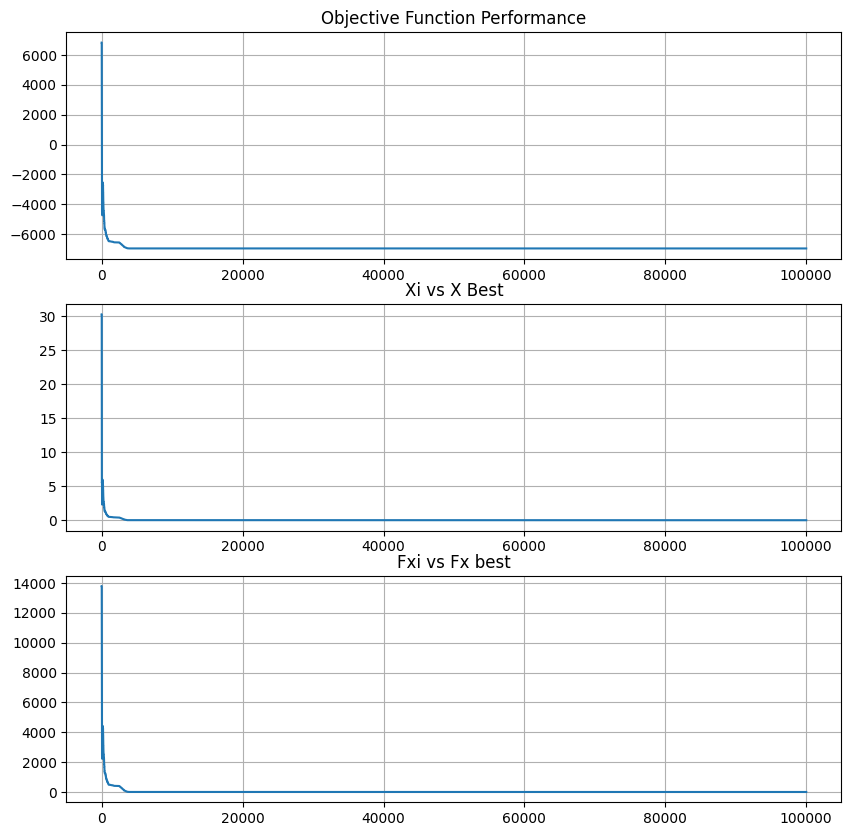

In [4]:
from _display import display_performance_results

rich_history = [{**hist, "||xi-X||": np.linalg.norm(np.array(hist["x"]) - x_best),
  "fxi - Fx": hist["fx"] - fx_best} for hist in differentialEvolution.history]
display_performance_results(rich_history)